In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
X=df.drop('sales',axis=1)

In [5]:
y=df['sales']

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [7]:
polynomial_converter=PolynomialFeatures(degree=2,include_bias=False)

In [8]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [9]:
poly_features=polynomial_converter.transform(X)

In [10]:
poly_features.shape

(200, 9)

In [11]:
type(poly_features)

numpy.ndarray

In [12]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
model=LinearRegression()

In [17]:
model.fit(X_train,y_train)

LinearRegression()

In [18]:
test_predictions=model.predict(X_test)

In [19]:
#  now evaluating performance

In [20]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [21]:
MAE=mean_absolute_error(y_test,test_predictions)

In [22]:
MSE=mean_squared_error(y_test,test_predictions)

In [23]:
RMSE=np.sqrt(MSE)

In [24]:
MAE

0.48967980448035886

In [25]:
RMSE

0.6646431757269

# in previous notebook , we get MAE=1.213 & RMSE=1.5

In [26]:
#  this polynomial regression is  performing better

In [27]:
#  now analyzing coefficients

In [28]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [29]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [30]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

# Bias-variance trade off (selecting model complexity with optimal performance on both training & test data)

In [31]:
#  complexity for polynomial regression is degree of polynomial

# we can get this optimal complexity by analyzing error vs complexity graph for both training and testing set

In [32]:
# steps:
# create the different order poly
# split poly features train/test
# fit on train
# store/save the rmse for BOTH the train AND test
# Plot the results (error vs poly order)

In [33]:
train_rmse_errors=[]
test_rmse_errors=[]

for d in range(1,10):
    poly_converter=PolynomialFeatures(degree=d,include_bias=False)
    poly_features=poly_converter.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    model=LinearRegression()
    model.fit(X_train,y_train)
    train_pred=model.predict(X_train)
    test_pred=model.predict(X_test)
    
    train_rmse=np.sqrt(mean_squared_error(y_train,train_pred))
    test_rmse=np.sqrt(mean_squared_error(y_test,test_pred))
    
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)
    

In [34]:
train_rmse_errors

[1.734594124329376,
 0.5879574085292234,
 0.43393443569020657,
 0.35170836883993556,
 0.2509342923789987,
 0.1956156925025929,
 5.421547696100478,
 0.14137016600250538,
 0.17122498951815454]

In [35]:
test_rmse_errors

[1.5161519375993877,
 0.6646431757269,
 0.5803286825219469,
 0.5077742640851456,
 2.575819388953378,
 4.335186390070786,
 1379.5295835582049,
 4077.6876482927823,
 95268.7801080893]

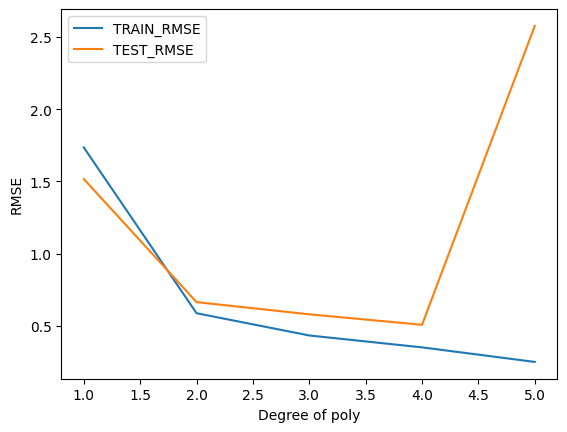

In [36]:
#  now plotting
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN_RMSE')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST_RMSE')
plt.ylabel('RMSE')
plt.xlabel('Degree of poly')
plt.legend()

# now as we decided to proceed with degree=3 , making the final model.

In [37]:
final_poly_converter=PolynomialFeatures(degree=3,include_bias=False)

In [38]:
final_converted_X=final_poly_converter.fit_transform(X)

In [39]:
final_converted_X.shape

(200, 19)

In [40]:
final_model=LinearRegression()

In [43]:
final_model.fit(final_converted_X,y)

LinearRegression()

In [44]:
from joblib import dump,load

In [46]:
dump(final_model,"final_poly_model.joblib")

['final_poly_model.joblib']

In [47]:
dump(final_poly_converter,"final_converter.joblib")

['final_converter.joblib']

In [49]:
loaded_converter=load("final_converter.joblib")

In [50]:
loaded_model=load("final_poly_model.joblib")

In [60]:
campaign=[[200,20,10]]

In [61]:
transformed_data=loaded_converter.fit_transform(campaign)

In [62]:
transformed_data.shape

(1, 19)

In [63]:
loaded_model.predict(transformed_data)

array([15.59038056])